# Недвижимость(Санкт-Петербург)

### Описание данных
- **airports_nearest** — расстояние до ближайшего аэропорта в метрах (м)
- **balcony** — число балконов
- **ceiling_height** — высота потолков (м)
- **cityCenters_nearest** — расстояние до центра города (м)
- **days_exposition** — сколько дней было размещено объявление (от публикации до снятия)
- **first_day_exposition** — дата публикации
- **floor** — этаж
- **floors_total** —  всего этажей в доме
- **is_apartment** — апартаменты (булев тип)
- **kitchen_area** — площадь кухни в квадратных метрах (м²)
- **last_price** — цена на момент снятия с публикации
- **living_area** — жилая площадь в квадратных метрах (м²)
- **locality_name** — название населённого пункта
- **open_plan** — свободная планировка (булев тип)
- **parks_around3000** — число парков в радиусе 3 км
- **parks_nearest** — расстояние до ближайшего парка (м)
- **ponds_around3000** — число водоёмов в радиусе 3 км
- **ponds_nearest** — расстояние до ближайшего водоёма (м)
- **rooms** — число комнат
- **studio** — квартира-студия (булев тип)
- **total_area** — площадь квартиры в квадратных метрах (м²)
- **total_images** — число фотографий квартиры в объявлении

**Цель исследования:**
1. Научиться определять рыночную стоимость объектов недвижимости
2. Найти факторы, которые больше всего влияют на стоимость квартиры


In [1]:
#Импортируем нужные для работы библиотеки
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Загружаем данные
df = pd.read_csv('real_estate_data.csv', sep='\t')

## 1. Изучение данных из файла

In [3]:
#Посмотрим общую информация о данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

- 23699 объектов и 22 признака для каждого

In [4]:
#shape
df.shape

(23699, 22)

In [5]:
# 5 случайных строк датафрейма
df.sample(n=5, random_state=1)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
17338,5,3300000.0,47.0,2018-03-30T00:00:00,1,3.00,10.0,NaN,4,NaN,...,NaN,NaN,деревня Новое Девяткино,NaN,NaN,NaN,NaN,NaN,NaN,42.0
13876,12,2290000.0,40.0,2016-01-17T00:00:00,2,3.00,3.0,27.0,2,False,...,7.4,NaN,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,895.0
3586,0,5450000.0,53.8,2018-02-01T00:00:00,2,2.85,2.0,36.5,2,NaN,...,5.3,1.0,Санкт-Петербург,38914.0,10617.0,1.0,255.0,0.0,NaN,64.0
6495,1,5482990.0,66.1,2016-02-19T00:00:00,2,NaN,25.0,43.6,1,NaN,...,11.1,0.0,поселок Бугры,NaN,NaN,NaN,NaN,NaN,NaN,469.0
14431,5,4190000.0,54.0,2017-10-30T00:00:00,2,3.00,12.0,34.0,3,NaN,...,9.0,2.0,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,73.0


## 2. Предобработка данных

In [6]:
#Изучим названия столбцов
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

In [7]:
# приводим название столбца 'cityCenters_nearest' к хорошему стилю(змеиный_регистр)
df = df.rename(columns={'cityCenters_nearest': 'city_centers_nearest'})

In [8]:
#проверим
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

- Все названия соответствуют хорошему стилю

In [9]:
#посмотрим пропущенные значения
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [10]:
# посмотрим на типы столбцов
df.dtypes

total_images              int64
last_price              float64
total_area              float64
first_day_exposition     object
rooms                     int64
ceiling_height          float64
floors_total            float64
living_area             float64
floor                     int64
is_apartment             object
studio                     bool
open_plan                  bool
kitchen_area            float64
balcony                 float64
locality_name            object
airports_nearest        float64
city_centers_nearest    float64
parks_around3000        float64
parks_nearest           float64
ponds_around3000        float64
ponds_nearest           float64
days_exposition         float64
dtype: object

- **Начнем более подробную проверку столбцов**

In [11]:
#посмотрим на столбец 'total_images
df['total_images'].value_counts(dropna=False)

10    1798
9     1725
20    1694
8     1585
7     1521
6     1482
11    1362
5     1301
12    1225
0     1059
13    1015
4      986
14     986
15     948
1      872
3      769
16     761
17     650
18     642
2      640
19     603
23      16
21      12
24       8
22       8
26       5
32       4
28       4
50       3
29       3
27       2
30       2
35       2
31       2
42       1
25       1
39       1
37       1
Name: total_images, dtype: int64

In [12]:
#приведем к целочисленному типу
df['total_images'] = df['total_images'].astype('int')

In [13]:
#посмотрим на столбец 'last_price'
df['last_price'].value_counts(dropna=False)

4500000.0     342
3500000.0     291
4300000.0     260
4000000.0     260
4200000.0     259
             ... 
12890000.0      1
29375000.0      1
7545600.0       1
5205000.0       1
11475000.0      1
Name: last_price, Length: 2978, dtype: int64

In [14]:
#приведем к целочисленному типу
df['last_price'] = df['last_price'].astype('int')

In [15]:
#цена за 400 м2, 7 комнат, и 3км до центра не вызывает подозрений
df.loc[df.loc[:, 'last_price'] == df['last_price'].max()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
12971,19,763000000,400.0,2017-09-30T00:00:00,7,NaN,10.0,250.0,10,NaN,...,NaN,2.0,Санкт-Петербург,25108.0,3956.0,1.0,530.0,3.0,756.0,33.0


In [16]:
#необычная цена за 2х комнатную квартиру и 109 м2, скорее всего опечатка
df.loc[df.loc[:, 'last_price'] == df['last_price'].min()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
8793,7,12190,109.0,2019-03-20T00:00:00,2,2.75,25.0,32.0,25,NaN,...,40.5,NaN,Санкт-Петербург,36421.0,9176.0,1.0,805.0,0.0,NaN,8.0


In [17]:
#Минимальная цена на квартиру в Питере начинается от 1.190.000
df.loc[df['locality_name'] == 'Санкт-Петербург'].sort_values(by='last_price')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
8793,7,12190,109.0,2019-03-20T00:00:00,2,2.75,25.0,32.0,25,NaN,...,40.5,NaN,Санкт-Петербург,36421.0,9176.0,1.0,805.0,0.0,NaN,8.0
19642,5,1190000,14.0,2018-07-29T00:00:00,1,NaN,5.0,11.0,1,NaN,...,2.0,NaN,Санкт-Петербург,9898.0,11122.0,0.0,NaN,0.0,NaN,4.0
4248,8,1200000,49.1,2018-10-21T00:00:00,4,2.50,5.0,36.9,1,NaN,...,5.2,NaN,Санкт-Петербург,17539.0,12313.0,0.0,NaN,0.0,NaN,44.0
8755,1,1350000,18.8,2017-11-22T00:00:00,0,2.75,19.0,15.8,1,NaN,...,NaN,NaN,Санкт-Петербург,37636.0,14479.0,0.0,NaN,1.0,1127.0,128.0
17961,3,1400000,13.0,2017-12-03T00:00:00,1,2.60,9.0,NaN,1,NaN,...,NaN,NaN,Санкт-Петербург,14350.0,15945.0,0.0,NaN,1.0,185.0,410.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15651,20,300000000,618.0,2017-12-18T00:00:00,7,3.40,7.0,258.0,5,NaN,...,70.0,NaN,Санкт-Петербург,32440.0,5297.0,0.0,NaN,2.0,198.0,111.0
1436,19,330000000,190.0,2018-04-04T00:00:00,3,3.50,7.0,95.0,5,NaN,...,40.0,NaN,Санкт-Петербург,23011.0,1197.0,3.0,519.0,3.0,285.0,233.0
14706,15,401300000,401.0,2016-02-20T00:00:00,5,NaN,9.0,204.0,9,False,...,24.0,3.0,Санкт-Петербург,21912.0,2389.0,1.0,545.0,1.0,478.0,393.0
19540,8,420000000,900.0,2017-12-06T00:00:00,12,2.80,25.0,409.7,25,NaN,...,112.0,NaN,Санкт-Петербург,30706.0,7877.0,0.0,NaN,2.0,318.0,106.0


In [18]:
#посмотрим на столбец 'total_area'
df['total_area'].value_counts(dropna=False)

45.00     419
42.00     383
60.00     347
31.00     346
44.00     345
         ... 
184.40      1
55.64       1
56.16       1
109.10      1
76.75       1
Name: total_area, Length: 2182, dtype: int64

In [19]:
#максимальное значение
df.loc[df.loc[:, 'total_area'] == df['total_area'].max()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
19540,8,420000000,900.0,2017-12-06T00:00:00,12,2.8,25.0,409.7,25,NaN,...,112.0,NaN,Санкт-Петербург,30706.0,7877.0,0.0,NaN,2.0,318.0,106.0


In [20]:
#минимальное значение
df.loc[df.loc[:, 'total_area'] == df['total_area'].min()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
19904,4,2400000,12.0,2017-07-19T00:00:00,1,2.55,5.0,10.0,2,NaN,...,NaN,NaN,Санкт-Петербург,21314.0,964.0,1.0,886.0,2.0,45.0,200.0


In [21]:
#посмотрим на столбец 'first_day_exposition'
df['first_day_exposition'].value_counts(dropna=False)

2018-02-01T00:00:00    368
2017-11-10T00:00:00    240
2017-10-13T00:00:00    124
2017-09-27T00:00:00    111
2018-03-26T00:00:00     97
                      ... 
2018-05-20T00:00:00      1
2015-05-15T00:00:00      1
2015-01-12T00:00:00      1
2015-12-19T00:00:00      1
2015-07-19T00:00:00      1
Name: first_day_exposition, Length: 1491, dtype: int64

In [22]:
#минимальное значение
df.loc[df.loc[:, 'first_day_exposition'] == df['first_day_exposition'].min()]
#имеем данные за 5 лет начиная с 2014 года
#максимальное значение
#df.loc[df.loc[:, 'first_day_exposition'] == df['first_day_exposition'].max()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
617,1,12036000,100.00,2014-11-27T00:00:00,3,NaN,16.0,52.00,3,NaN,...,11.00,1.0,Санкт-Петербург,37407.0,8434.0,1.0,456.0,2.0,454.0,606.0
696,1,3364930,34.69,2014-11-27T00:00:00,1,2.64,25.0,23.43,25,NaN,...,23.43,2.0,Санкт-Петербург,43396.0,12153.0,0.0,NaN,0.0,NaN,574.0
2831,9,5990000,64.40,2014-11-27T00:00:00,2,3.12,4.0,36.20,1,NaN,...,14.60,0.0,Санкт-Петербург,24668.0,5236.0,1.0,366.0,0.0,NaN,1069.0
3291,8,8200000,52.50,2014-11-27T00:00:00,1,NaN,8.0,21.50,2,NaN,...,15.10,NaN,Санкт-Петербург,39393.0,11096.0,1.0,537.0,0.0,NaN,NaN
3486,2,14500000,97.40,2014-11-27T00:00:00,2,3.00,8.0,36.30,2,False,...,31.70,0.0,Санкт-Петербург,39393.0,11096.0,1.0,537.0,0.0,NaN,1078.0
3873,7,20100000,117.60,2014-11-27T00:00:00,3,NaN,8.0,62.50,7,NaN,...,21.50,NaN,Санкт-Петербург,39393.0,11096.0,1.0,537.0,0.0,NaN,NaN
3955,1,12561120,93.60,2014-11-27T00:00:00,3,3.00,16.0,52.00,5,NaN,...,10.90,2.0,Санкт-Петербург,37407.0,8434.0,1.0,456.0,2.0,454.0,583.0
4812,1,27933600,180.80,2014-11-27T00:00:00,4,3.10,16.0,94.89,11,NaN,...,20.16,0.0,Санкт-Петербург,37407.0,8434.0,1.0,456.0,2.0,454.0,586.0
6726,6,11995000,83.82,2014-11-27T00:00:00,2,2.73,11.0,42.31,1,NaN,...,17.85,NaN,Санкт-Петербург,39946.0,10720.0,1.0,2102.0,3.0,303.0,1406.0
7027,1,21453004,156.40,2014-11-27T00:00:00,4,NaN,13.0,NaN,13,NaN,...,NaN,NaN,Санкт-Петербург,29990.0,4870.0,1.0,641.0,1.0,145.0,1214.0


In [23]:
#заменим тип данных в столбце 'first_day_exposition' на datetime64 
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [24]:
#проверим
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int32         
 1   last_price            23699 non-null  int32         
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          2775 non-null   object        
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

In [25]:
#посмотрим на столбец 'rooms'
df['rooms'].value_counts(dropna=False)

1     8047
2     7940
3     5814
4     1180
5      326
0      197
6      105
7       59
8       12
9        8
10       3
11       2
14       2
15       1
19       1
16       1
12       1
Name: rooms, dtype: int64

In [26]:
#посмотрим на столбец 'ceiling_height'
df['ceiling_height'].value_counts(dropna=False)

NaN     9195
2.50    3515
2.60    1646
2.70    1574
3.00    1112
        ... 
5.00       1
2.20       1
4.15       1
3.93       1
3.59       1
Name: ceiling_height, Length: 184, dtype: int64

In [27]:
#заменим пропуски медианным значением
df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].median())

In [28]:
#проверим
df['ceiling_height'].isna().sum()

0

In [29]:
#приведем к целочисленному типу
df['ceiling_height'] = df['ceiling_height'].astype('int')

In [30]:
#проверим
df['ceiling_height'].dtype

dtype('int32')

In [31]:
#посмотрим на столбец 'floors_total'
df['floors_total'].value_counts(dropna=False)

5.0     5788
9.0     3761
16.0    1376
12.0    1362
4.0     1200
10.0    1174
25.0    1075
6.0      914
17.0     833
3.0      668
7.0      592
14.0     553
18.0     505
24.0     469
8.0      390
2.0      383
15.0     365
23.0     352
19.0     339
22.0     286
20.0     271
13.0     229
11.0     203
27.0     164
21.0     158
26.0     124
NaN       86
1.0       25
35.0      24
28.0      21
36.0       3
34.0       1
60.0       1
29.0       1
33.0       1
52.0       1
37.0       1
Name: floors_total, dtype: int64

In [32]:
#заменим пропуски медианным значением и приведем к целочисленному типу
df['floors_total'] = df['floors_total'].fillna(df['floors_total'].median()).astype('int')

In [33]:
#проверим
df['floors_total'].value_counts(dropna=False)

5     5788
9     3847
16    1376
12    1362
4     1200
10    1174
25    1075
6      914
17     833
3      668
7      592
14     553
18     505
24     469
8      390
2      383
15     365
23     352
19     339
22     286
20     271
13     229
11     203
27     164
21     158
26     124
1       25
35      24
28      21
36       3
34       1
60       1
29       1
33       1
52       1
37       1
Name: floors_total, dtype: int64

In [34]:
#посмотрим на столбец 'living_area'
df['living_area'].value_counts(dropna=False)

NaN       1903
18.00      882
17.00      675
30.00      598
16.00      486
          ... 
76.70        1
39.41        1
124.90       1
36.07        1
42.55        1
Name: living_area, Length: 1783, dtype: int64

- Корректно восстановить пропущенные значения не получится, предлагаю двигаться дальше

In [35]:
#посмотрим на столбец 'floor'
df['floor'].value_counts(dropna=False)

2     3368
3     3073
1     2917
4     2804
5     2621
6     1305
7     1218
8     1083
9     1051
10     687
12     526
11     523
13     379
15     343
14     337
16     315
17     227
18     178
19     147
21     125
22     113
20     110
23     100
24      63
25      46
26      24
27      10
28       1
30       1
29       1
32       1
33       1
31       1
Name: floor, dtype: int64

In [36]:
#приведем к целочисленному типу
df['floor'] = df['floor'].astype('int')

In [37]:
#проверим
df['floor'].dtype

dtype('int32')

In [38]:
#посмотрим на столбец 'is_apartment'
df['is_apartment'].value_counts(dropna=False)

NaN      20924
False     2725
True        50
Name: is_apartment, dtype: int64

In [39]:
#заменим пропущенные значения на False приведем к булеву типу 
df['is_apartment'] = df['is_apartment'].fillna(False).astype('bool')

In [40]:
#проверим
df['is_apartment'].value_counts(dropna=False)

False    23649
True        50
Name: is_apartment, dtype: int64

In [41]:
#посмотрим на столбец 'studio'
df['studio'].value_counts(dropna=False)

False    23550
True       149
Name: studio, dtype: int64

In [42]:
#посмотрим на столбец 'open_plan'
df['open_plan'].value_counts(dropna=False)

False    23632
True        67
Name: open_plan, dtype: int64

In [43]:
#посмотрим на столбец 'kitchen_area'
df['kitchen_area'].value_counts(dropna=False)

NaN      2278
6.00     1300
10.00    1262
8.00     1110
9.00     1101
         ... 
53.10       1
12.56       1
11.84       1
13.27       1
13.83       1
Name: kitchen_area, Length: 972, dtype: int64

- Корректно восстановить пропущенные значения не получится, предлагаю двигаться дальше

In [44]:
#посмотрим на столбец 'balcony'
df['balcony'].value_counts(dropna=False)

NaN    11519
1.0     4195
0.0     3758
2.0     3659
5.0      304
4.0      183
3.0       81
Name: balcony, dtype: int64

In [45]:
#заменим пропущенные значения на 0 приведем к целочисленному типу 
df['balcony'] = df['balcony'].fillna(False).astype('int')

In [46]:
#проверим
df['balcony'].value_counts(dropna=False)

0    15277
1     4195
2     3659
5      304
4      183
3       81
Name: balcony, dtype: int64

In [47]:
#посмотрим на столбец 'locality_name'
df['locality_name'].sample(n=5)

1276     Санкт-Петербург
15112           Волосово
22477     посёлок Шушары
10545    Санкт-Петербург
4908             Колпино
Name: locality_name, dtype: object

In [48]:
#посмотрим пропущенные значения
df['locality_name'].isna().sum()

49

In [49]:
#приведем названия к нижнему регистру для удобства
df['locality_name'] = df['locality_name'].str.lower()

In [50]:
#удалим пропущенные значения и обновим индексы датафрейма так как их не много на данных это не отразится
df = df.dropna(subset=['locality_name']).reset_index(drop=True)

In [51]:
#проверим
df['locality_name'].isna().sum()

0

In [52]:
#посмотрим на столбец 'airports_nearest'
df['airports_nearest'].value_counts(dropna=False)

NaN        5534
37434.0      61
21928.0      32
44870.0      30
39946.0      30
           ... 
19575.0       1
26007.0       1
23576.0       1
30204.0       1
24665.0       1
Name: airports_nearest, Length: 8258, dtype: int64

In [53]:
#так как значение пропущены скорее всего по близости нет аиропортов, поэтому предлагаю заменить пропущенное значение на 0
df['airports_nearest'] = df['airports_nearest'].fillna(0).astype('int')

In [54]:
#проверим
df['airports_nearest'].isna().sum()

0

In [55]:
#посмотрим на столбец 'city_centers_nearest'
df['city_centers_nearest'].value_counts(dropna=False)

NaN        5511
8460.0       61
20802.0      32
10720.0      30
8434.0       27
           ... 
24311.0       1
15782.0       1
25620.0       1
11940.0       1
6263.0        1
Name: city_centers_nearest, Length: 7628, dtype: int64

- Корректно восстановить пропущенные значения не получится, предлагаю двигаться дальше

In [56]:
#посмотрим на столбец 'parks_around3000'
df['parks_around3000'].value_counts(dropna=False)

0.0    10080
1.0     5671
NaN     5510
2.0     1744
3.0      645
Name: parks_around3000, dtype: int64

- Корректно восстановить пропущенные значения не получится, предлагаю двигаться дальше

In [57]:
#посмотрим на столбец 'parks_nearest'
df['parks_nearest'].value_counts(dropna=False)

NaN       15586
441.0        67
392.0        41
173.0        41
456.0        40
          ...  
916.0         1
775.0         1
858.0         1
133.0         1
2984.0        1
Name: parks_nearest, Length: 995, dtype: int64

- Корректно восстановить пропущенные значения не получится, предлагаю двигаться дальше

In [58]:
#посмотрим на столбец 'ponds_around3000'
df['ponds_around3000'].value_counts(dropna=False)

0.0    9055
1.0    5702
NaN    5510
2.0    1889
3.0    1494
Name: ponds_around3000, dtype: int64

- Корректно восстановить пропущенные значения не получится, предлагаю двигаться дальше

In [59]:
#посмотрим на столбец 'ponds_nearest'
df['ponds_nearest'].value_counts(dropna=False)

NaN       14565
427.0        70
454.0        41
153.0        40
433.0        39
          ...  
1020.0        1
1313.0        1
1337.0        1
622.0         1
1134.0        1
Name: ponds_nearest, Length: 1097, dtype: int64

In [60]:
#посмотрим на столбец 'days_exposition'
df['days_exposition'].value_counts(dropna=False)

NaN       3180
45.0       879
60.0       538
7.0        234
30.0       208
          ... 
1553.0       1
793.0        1
1434.0       1
1231.0       1
971.0        1
Name: days_exposition, Length: 1142, dtype: int64

In [61]:
#заменим пропущенные значения на медианное
df['days_exposition'] = df['days_exposition'].fillna(df['days_exposition'].median()).astype('int')

In [62]:
#проверим
df['days_exposition'].isna().sum()

0

In [63]:
#посмотрим на дубликаты
df.duplicated().sum()

0

**Вывод:**
1. В данных много пропущенных значений
2. Постарались заменить пропущенные значения там, где это возможно
3. Заменили типы данных в некоторых столбцах для удобства

## 3. Расчёты и добавление результатов в таблицу

In [64]:
#добавит цену за один м2
df['price_m'] = round(df['last_price'] / df['total_area']).astype('int')

In [65]:
#проверим
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_m
0,20,13000000,108.0,2019-03-07,3,2,16,51.0,8,False,...,0,санкт-петербург,18863,16028.0,1.0,482.0,2.0,755.0,95,120370
1,7,3350000,40.4,2018-12-04,1,2,11,18.6,1,False,...,2,посёлок шушары,12817,18603.0,0.0,NaN,0.0,NaN,81,82921
2,10,5196000,56.0,2015-08-20,2,2,5,34.3,4,False,...,0,санкт-петербург,21741,13933.0,1.0,90.0,2.0,574.0,558,92786
3,0,64900000,159.0,2015-07-24,3,2,14,NaN,9,False,...,0,санкт-петербург,28098,6800.0,2.0,84.0,3.0,234.0,424,408176
4,2,10000000,100.0,2018-06-19,2,3,14,32.0,13,False,...,0,санкт-петербург,31856,8098.0,2.0,112.0,1.0,48.0,121,100000


In [66]:
#добавим год, месяц, день
df['year'] = df['first_day_exposition'].dt.year
df['month'] = df['first_day_exposition'].dt.month
df['week_day'] = df['first_day_exposition'].dt.weekday

In [67]:
#проверим
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_m,year,month,week_day
0,20,13000000,108.0,2019-03-07,3,2,16,51.0,8,False,...,16028.0,1.0,482.0,2.0,755.0,95,120370,2019,3,3
1,7,3350000,40.4,2018-12-04,1,2,11,18.6,1,False,...,18603.0,0.0,NaN,0.0,NaN,81,82921,2018,12,1
2,10,5196000,56.0,2015-08-20,2,2,5,34.3,4,False,...,13933.0,1.0,90.0,2.0,574.0,558,92786,2015,8,3
3,0,64900000,159.0,2015-07-24,3,2,14,NaN,9,False,...,6800.0,2.0,84.0,3.0,234.0,424,408176,2015,7,4
4,2,10000000,100.0,2018-06-19,2,3,14,32.0,13,False,...,8098.0,2.0,112.0,1.0,48.0,121,100000,2018,6,1


In [68]:
# функция категоризации по этажам
def floor_category(row):
    floor = row['floor']
    floors_total = row['floors_total']
    if floor == 1:
        return 'первый'
    elif floors_total == floor:
        return 'последний'
    else:
        return 'другой'
    
#категоризуем этажи с помощью функции floor_category
df['floor_category'] = df.apply(floor_category, axis = 1)

In [69]:
#ручной способ замены
df.loc[df['floor'] == 1, 'floor_category'] = 'первый'
df.loc[df['floor'] == df['floors_total'], 'floor_category'] = 'последний'

In [70]:
#посмотрим
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_m,year,month,week_day,floor_category
0,20,13000000,108.0,2019-03-07,3,2,16,51.0,8,False,...,1.0,482.0,2.0,755.0,95,120370,2019,3,3,другой
1,7,3350000,40.4,2018-12-04,1,2,11,18.6,1,False,...,0.0,NaN,0.0,NaN,81,82921,2018,12,1,первый
2,10,5196000,56.0,2015-08-20,2,2,5,34.3,4,False,...,1.0,90.0,2.0,574.0,558,92786,2015,8,3,другой
3,0,64900000,159.0,2015-07-24,3,2,14,NaN,9,False,...,2.0,84.0,3.0,234.0,424,408176,2015,7,4,другой
4,2,10000000,100.0,2018-06-19,2,3,14,32.0,13,False,...,2.0,112.0,1.0,48.0,121,100000,2018,6,1,другой


In [71]:
#оставшиеся пропущенные значения являются категорией 'другой'
df['floor_category'] = df['floor_category'].fillna('другой') 

In [72]:
#проверим
df.loc[df['floor_category'] == 'другой']

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_m,year,month,week_day,floor_category
0,20,13000000,108.00,2019-03-07,3,2,16,51.0,8,False,...,1.0,482.0,2.0,755.0,95,120370,2019,3,3,другой
2,10,5196000,56.00,2015-08-20,2,2,5,34.3,4,False,...,1.0,90.0,2.0,574.0,558,92786,2015,8,3,другой
3,0,64900000,159.00,2015-07-24,3,2,14,NaN,9,False,...,2.0,84.0,3.0,234.0,424,408176,2015,7,4,другой
4,2,10000000,100.00,2018-06-19,2,3,14,32.0,13,False,...,2.0,112.0,1.0,48.0,121,100000,2018,6,1,другой
5,10,2890000,30.40,2018-09-10,1,2,12,14.4,5,False,...,NaN,NaN,NaN,NaN,55,95066,2018,9,0,другой
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23643,2,1350000,30.00,2017-07-07,1,2,5,17.5,4,False,...,NaN,NaN,NaN,NaN,413,45000,2017,7,4,другой
23644,9,4600000,62.40,2016-08-05,3,2,9,40.0,8,False,...,1.0,352.0,1.0,675.0,239,73718,2016,8,4,другой
23645,9,9700000,133.81,2017-03-21,3,3,5,73.3,3,False,...,1.0,796.0,3.0,381.0,95,72491,2017,3,1,другой
23646,14,3100000,59.00,2018-01-15,3,2,5,38.0,4,False,...,NaN,NaN,NaN,NaN,45,52542,2018,1,0,другой


In [73]:
#добавим столбец соотношение жилой и общей площади
df['living_ratio'] = df['living_area'] / df['total_area']
#добавим столбец cоотношение площади кухни к общей
df['kitchen_ratio'] = df['kitchen_area'] / df['total_area']

In [74]:
#проверим
df.sample(n=8)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_m,year,month,week_day,floor_category,living_ratio,kitchen_ratio
12727,11,4300000,74.0,2017-10-13,3,2,9,NaN,8,False,...,NaN,NaN,557,58108,2017,10,4,другой,NaN,0.108108
7055,12,4900000,60.0,2017-11-22,2,2,14,NaN,4,False,...,NaN,NaN,80,81667,2017,11,2,другой,NaN,NaN
12064,17,24499000,133.6,2019-04-05,4,2,17,75.6,14,False,...,1.0,198.0,95,183376,2019,4,4,другой,0.565868,0.272455
15187,10,5100000,60.0,2015-09-30,3,2,9,38.2,5,False,...,1.0,968.0,265,85000,2015,9,2,другой,0.636667,0.133333
1351,12,2120000,58.0,2017-12-13,2,2,5,45.0,1,False,...,NaN,NaN,149,36552,2017,12,2,первый,0.775862,0.155172
18127,0,4700000,45.0,2018-03-16,2,2,9,29.0,2,False,...,1.0,558.0,11,104444,2018,3,4,другой,0.644444,0.177778
18829,20,3850000,44.6,2018-07-13,2,2,5,28.5,1,False,...,0.0,NaN,136,86323,2018,7,4,первый,0.639013,0.134529
11728,5,39773280,136.0,2018-06-15,4,2,8,NaN,5,False,...,1.0,895.0,96,292451,2018,6,4,другой,NaN,0.352941


- больше всего квартир расположено на 2 этаже

In [75]:
df.groupby(['floor', 'floor_category']).agg({'floor_category':["count"]})

floor_category
                              count
floor floor_category               
1     первый                   2887
      последний                  25
2     другой                   3163
      последний                 190
3     другой                   2832
      последний                 233
4     другой                   2472
      последний                 330
5     другой                   1343
      последний                1273
6     другой                   1155
      последний                 147
7     другой                   1126
      последний                  89
8     другой                   1039
      последний                  44
9     другой                    651
      последний                 399
10    другой                    569
      последний                 118
11    другой                    510
      последний                  13
12    другой                    405
      последний                 120
13    другой                    357
      последний                  22
14    другой                    302
      последний                  33
15    другой                    322
      последний                  21
16    другой                    224
      последний                  91
17    другой                    185
      последний                  42
18    другой                    143
      последний                  35
19    другой                    121
      последний                  26
20    другой                    103
      последний                   7
21    другой                    117
      последний                   6
22    другой                     99
      последний                  13
23    другой                     84
      последний                  15
24    другой                     45
      последний                  18
25    другой                     10
      последний                  36
26    другой                     17
      последний                   7
27    другой                      3
      последний                   7
28    другой                      1
29    другой                      1
30    другой                      1
31    другой                      1
32    другой                      1
33    другой                      1

In [76]:
#квартира, которая продавалась дольше всех(если, просто не сняли объявление) 
df['days_exposition'].max()

1580

In [77]:
#квартира, которая продавалась быстрее всех (если, просто не сняли объявление) 
df['days_exposition'].min()

1

In [78]:
df.loc[df['days_exposition'] == df['days_exposition'].min()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_m,year,month,week_day,floor_category,living_ratio,kitchen_ratio
1631,19,4000000,49.9,2019-05-01,2,2,9,25.0,1,False,...,1.0,681.0,1,80160,2019,5,2,первый,0.501002,0.200401


## 4. Исследовательский анализ данных

<AxesSubplot:>

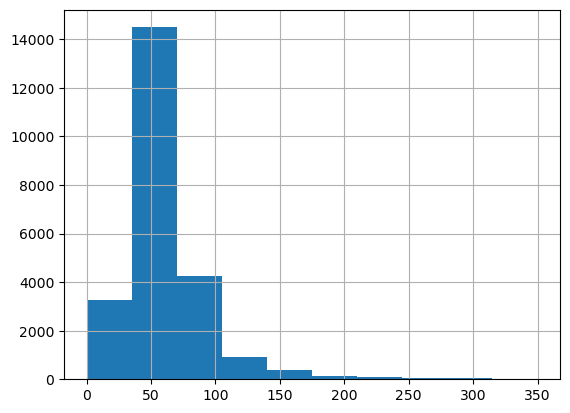

In [79]:
df['total_area'].hist(range=(0, 350))

In [80]:
df['total_area'].describe()

count    23650.000000
mean        60.329069
std         35.661808
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

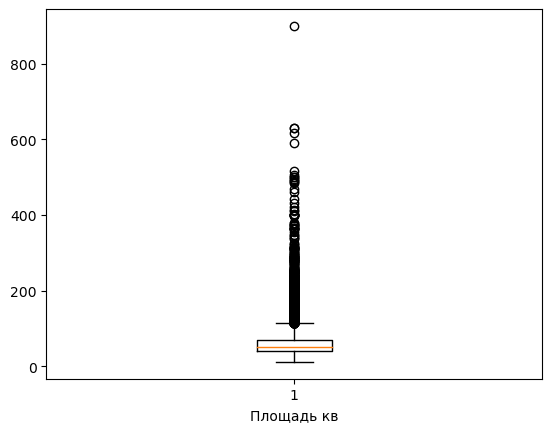

In [81]:
plt.boxplot(df['total_area']);
plt.xlabel('Площадь кв')
plt.show()

- Средняя площадь квартир составляет - 52м2
- Минимальная - 12

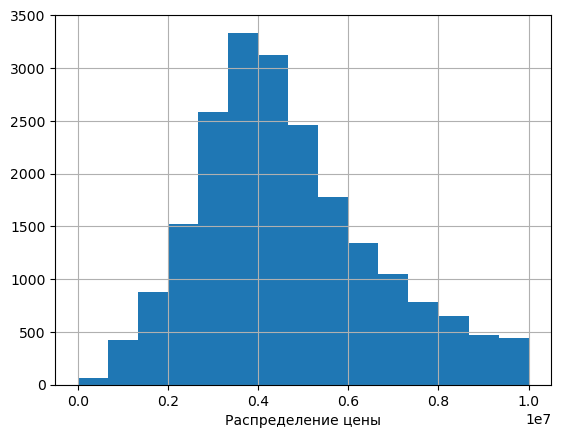

In [82]:
df['last_price'].hist(bins=15, range=(0, 10000000))
plt.xlabel('Распределение цены')
plt.show()

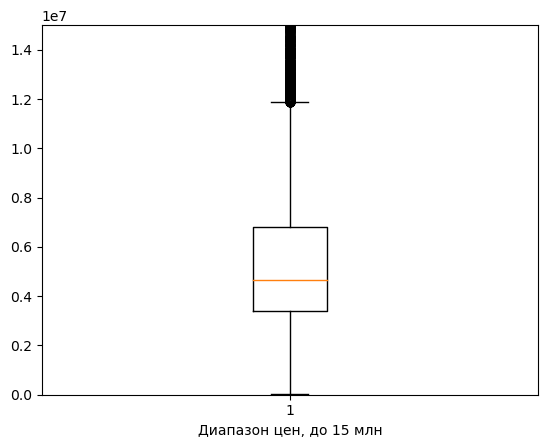

In [83]:
plt.boxplot(df['last_price']) 
plt.ylim(0, 15000000)
plt.xlabel('Диапазон цен, до 15 млн')
plt.show()

In [84]:
df['last_price'].describe()

count    2.365000e+04
mean     6.541127e+06
std      1.089640e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.799000e+06
max      7.630000e+08
Name: last_price, dtype: float64

- Средняя цена на квариру -  примерно 4.5 млн.р
- Минимальная - примерно 1.2 млн.р

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Все так и есть

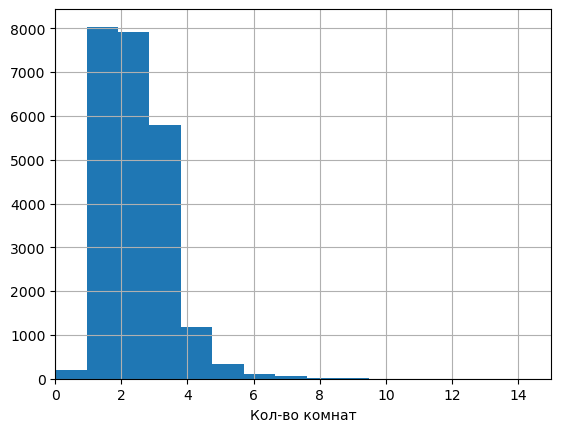

In [85]:
df['rooms'].hist(bins=20)
plt.xlim(0, 15)
plt.xlabel('Кол-во комнат')
plt.show()

In [86]:
df['rooms'].describe()

count    23650.000000
mean         2.070106
std          1.078620
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

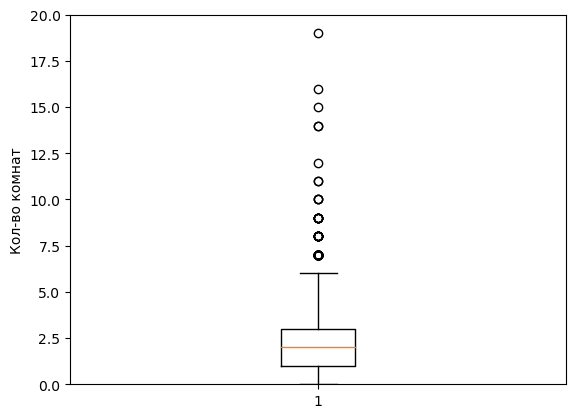

In [87]:
plt.boxplot(df['rooms'])
plt.ylim(0, 20)
plt.ylabel('Кол-во комнат')
plt.show()

- В среднем больше продается 2х комнатных квартир
- Присутствует достаточное количество аномальных значений

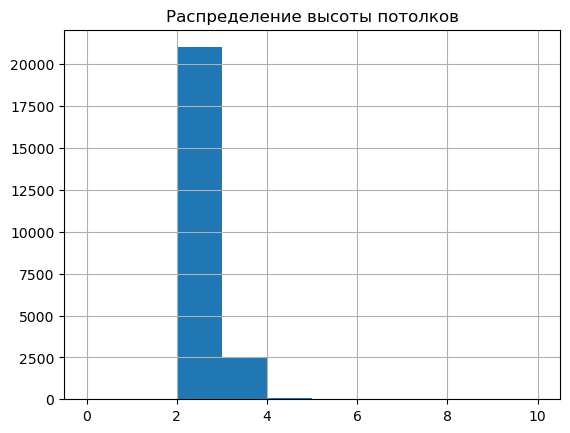

In [88]:
df['ceiling_height'].hist(range=(0, 10))
plt.title('Распределение высоты потолков')
plt.show()

In [89]:
df['ceiling_height'].describe()

count    23650.000000
mean         2.142368
std          1.034229
min          1.000000
25%          2.000000
50%          2.000000
75%          2.000000
max        100.000000
Name: ceiling_height, dtype: float64

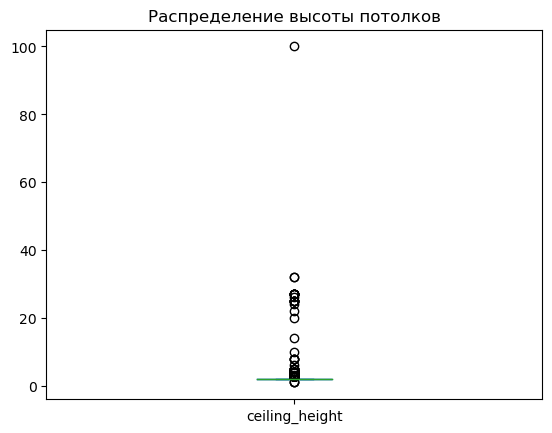

In [90]:
df['ceiling_height'].plot(kind='box');
plt.title('Распределение высоты потолков')
plt.show()

- В среднем высота потолка составляет 2м
- Так же присутствуют аномальные значения

<AxesSubplot:>

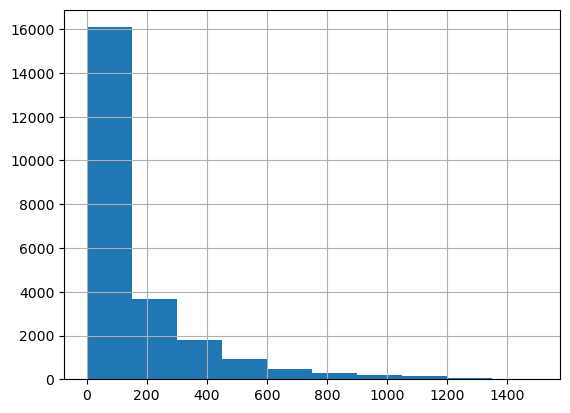

In [91]:
df['days_exposition'].hist(range=(0, 1500))

In [92]:
df['days_exposition'].describe()

count    23650.000000
mean       169.222748
std        206.550577
min          1.000000
25%         45.000000
50%         95.000000
75%        198.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [93]:
df['days_exposition'].median()

95.0

**Вывод:**
- В среднем продажа квартиры занимает 95 дней
- Продажа прошла быстро если продана менее чем за 95 дней
- Характеристика средней квартиры:
    1. 2х комнатная
    2. Цена примерно 4.5 млн.р
    3. Высота потолков 2-2.5 м
    4. С площадью 52 м2

In [94]:
#отфильтруем аномальные значения
filtered_price = df.query('last_price <= 10000000')
filtered_area = df.query('total_area <= 80')
filtered_rooms = df.query('rooms <= 6')
filtered_ceiling = df.query('ceiling_height <= 6')
filtered_days = df.query('days_exposition <= 400')

<AxesSubplot:>

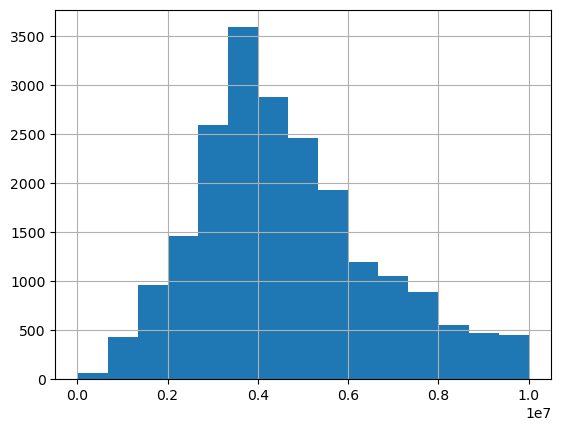

In [95]:
#немного подкорректировали отфильтрованное значение и проверили
filtered_price['last_price'].hist(bins=15)

<AxesSubplot:>

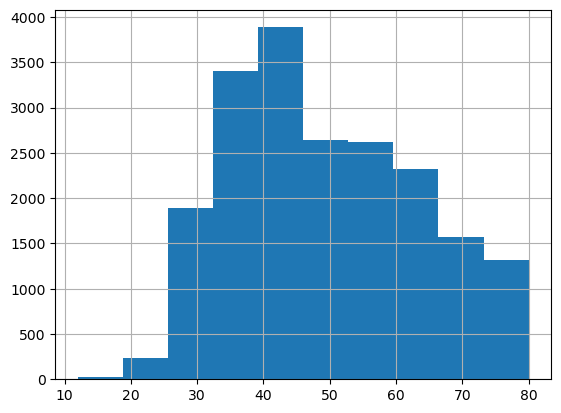

In [96]:
#считаю этот срез верным, распределение большей части значений в том же диапазоне(при range=(0, 350))
filtered_area['total_area'].hist()

(0.0, 8.0)

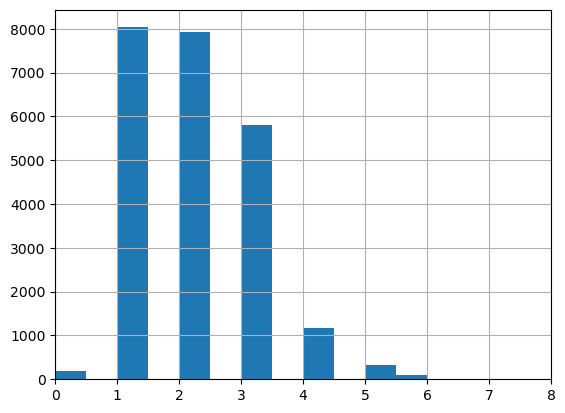

In [97]:
#так же считаю данный срез верным
filtered_rooms['rooms'].hist(bins=12)
plt.xlim(0, 8) # (0, 8) для удобства, та же картина при (0, 15)

<AxesSubplot:>

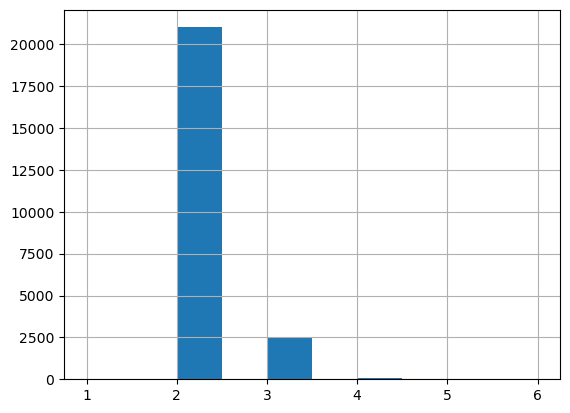

In [98]:
#так же считаю данный срез верным
filtered_ceiling['ceiling_height'].hist() #range=(0, 10)

<AxesSubplot:>

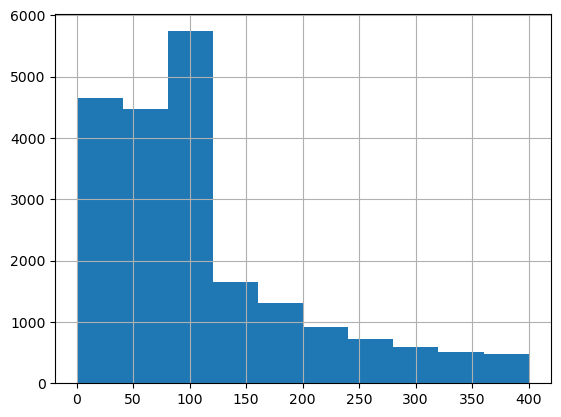

In [99]:
#так же считаю данный срез верным
filtered_days['days_exposition'].hist() #range=(0, 1500)

- **Какие факторы больше всего влияют на стоимость квартиры?**
1. зависит ли цена от квадратного метра?
2. зависит ли цена от числа комнат?
3. зависит ли цена от этажа? 
4. зависит ли цена от удалённости от центра?
5. зависит ли цена от даты размещения: дня недели, месяца и года?

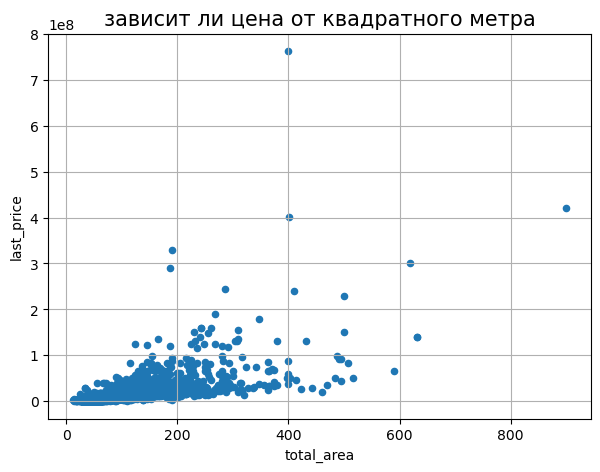

In [100]:
df.plot(y='last_price',x='total_area',kind='scatter', figsize=(7,5), grid=True)
plt.title('зависит ли цена от квадратного метра', fontsize=15)
plt.show()

In [101]:
#кореляция между площадью и ценой за 1м2
print(round(df['total_area'].corr(df['price_m']), 2))

0.3


- Кореляция присутствует, хоть и слабая, возможно кореляция не прямая, а более сложная

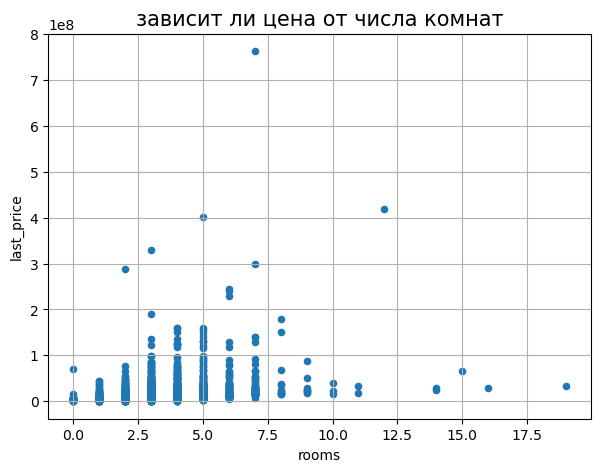

In [102]:
df.plot(y='last_price',x='rooms',kind='scatter', figsize=(7,5), grid=True)
plt.title('зависит ли цена от числа комнат', fontsize=15)
plt.show()

In [103]:
#кореляция между ценой и количеством комнат 
print(round(df['last_price'].corr(df['rooms']), 2))

0.36


- Кореляция присутствует, хоть и слабая, возможно кореляция не прямая, а более сложная

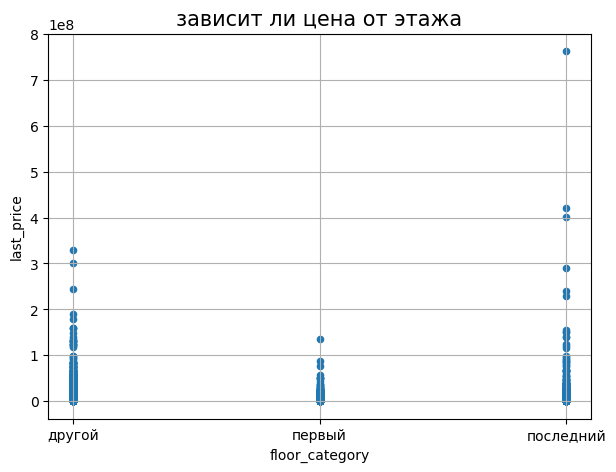

In [104]:
df.plot(y='last_price',x='floor_category', kind='scatter', figsize=(7,5), grid=True)
plt.title('зависит ли цена от этажа', fontsize=15)
plt.show()

- Квартиры на первом этаже дешевле чем на последним или любом другом

In [105]:
price_floor = pd.pivot_table(df, index='floor_category', values='last_price', aggfunc='median')

<AxesSubplot:xlabel='floor_category'>

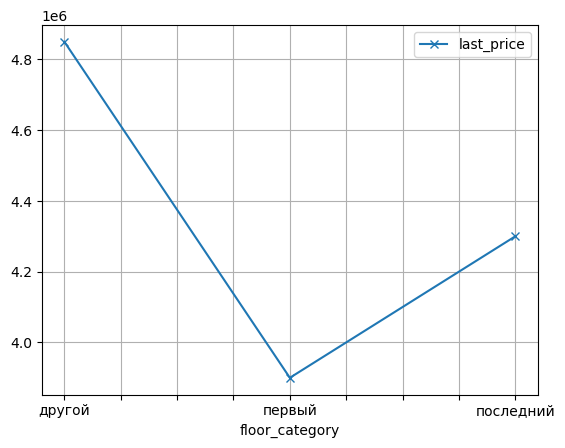

In [106]:
price_floor.plot(y='last_price', style='x-', grid=True)

- 
1. Дешевле всего квартиры на первом этаже
2. У квартир на последнем цена выше чем на первом

In [107]:
#кореляция между ценой и количеством комнат 
print(round(df['floor'].corr(df['price_m']), 2))

0.13


- Кореляция присутствует, хоть и слабая, возможно кореляция не прямая, а более сложная

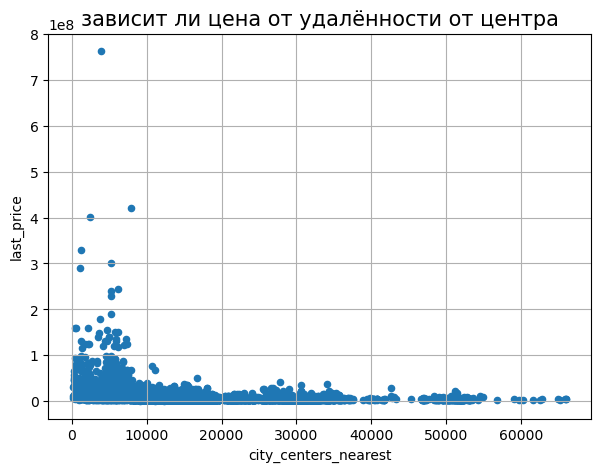

In [108]:
df.plot(y='last_price',x='city_centers_nearest', kind='scatter', figsize=(7,5), grid=True)
plt.title('зависит ли цена от удалённости от центра', fontsize=15)
plt.show()

In [109]:
#кореляция между ценой и расстоянием до центра 
print(round(df['price_m'].corr(df['city_centers_nearest']), 2))

-0.32


- Отрицательная кореляция присутствует, хоть и слабая, возможно кореляция не прямая, а более сложная
- Чем дальше от центра, тем меньше цена и наоборот

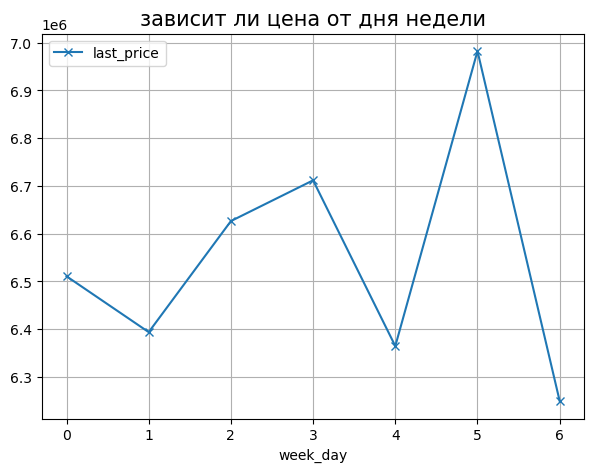

In [110]:
dependence_day = df.pivot_table(index='week_day', values='last_price')
dependence_day.plot(y='last_price',  style='x-', kind='line', figsize=(7,5), grid=True)
plt.title('зависит ли цена от дня недели', fontsize=15)
plt.show()

- В субботу выкладывают объявления с самой большой ценой
- В воскресенье выкладывают объявления с самой низкой  ценой

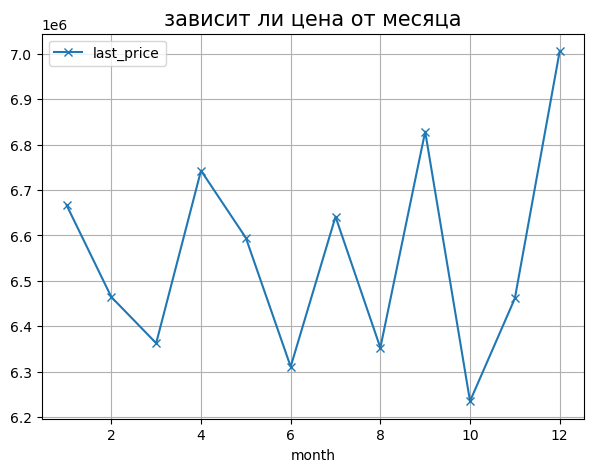

In [111]:
dependence_month = df.pivot_table(index='month', values='last_price')
dependence_month.plot(y='last_price',  style='x-', kind='line', figsize=(7,5), grid=True)
plt.title('зависит ли цена от месяца', fontsize=15)
plt.show()

- В Октябре цены на квартиры меньше всего
- В Декабре самые высокие цены

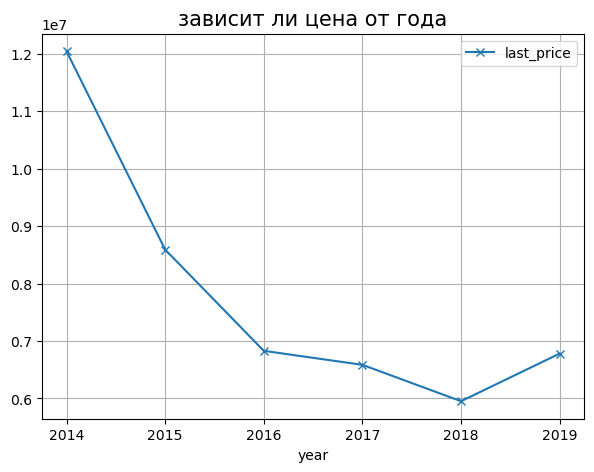

In [112]:
dependence_year = df.pivot_table(index='year', values='last_price')
dependence_year.plot(y='last_price',  style='x-', kind='line', figsize=(7,5), grid=True)
plt.title('зависит ли цена от года', fontsize=15)
plt.show()

- С 2014 по 2018 цена снизилась в 2 раза

**Вывод:**
- Есть зависимость между ценой и этажем, годом, днем недели, месяцем, площадью, кол-вом комнат, удаленностью от центра
- Квартира с самой низкой ценой, по исследованием данных за 14-2019 годы будет в октябре, в воскресенье, 2018 года, на первом этаже


In [113]:
popular_cities = df.pivot_table(index='locality_name', values='price_m', aggfunc=['count', 'median'])
popular_cities.columns = ['count', 'median']                         
print(popular_cities.sort_values(by='count', ascending=False).head(10))

                   count    median
locality_name                     
санкт-петербург    15721  104762.0
посёлок мурино       522   85878.5
посёлок шушары       440   76876.0
всеволожск           398   65789.0
пушкин               369  100000.0
колпино              338   74723.5
посёлок парголово    327   91643.0
гатчина              307   67797.0
деревня кудрово      299   91860.0
выборг               237   58158.0


-  10 населенных пунктов с наибольшим числом объявлений
- Цена за 1 м2 в Питере - 104.762р самый дорогой метр
- Самый дешевый метр - Выборг - 58.158р

********

**Выделите квартиры в Санкт-Петербурге** 
- Какая область входит в центр?

In [114]:
#создадим столбец расстояние до центра в км
df['center_km'] = round(df['city_centers_nearest'] / 1000)
#приведем к целочисленному типу
df['center_km'] = df['center_km'].astype('int', errors='ignore')
#узнаем цену за каждый км
df['price_km'] = df['last_price'] / df['center_km']

In [115]:
#проверим
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,price_m,year,month,week_day,floor_category,living_ratio,kitchen_ratio,center_km,price_km
0,20,13000000,108.0,2019-03-07,3,2,16,51.0,8,False,...,95,120370,2019,3,3,другой,0.472222,0.231481,16.0,8.125000e+05
1,7,3350000,40.4,2018-12-04,1,2,11,18.6,1,False,...,81,82921,2018,12,1,первый,0.460396,0.272277,19.0,1.763158e+05
2,10,5196000,56.0,2015-08-20,2,2,5,34.3,4,False,...,558,92786,2015,8,3,другой,0.612500,0.148214,14.0,3.711429e+05
3,0,64900000,159.0,2015-07-24,3,2,14,NaN,9,False,...,424,408176,2015,7,4,другой,NaN,NaN,7.0,9.271429e+06
4,2,10000000,100.0,2018-06-19,2,3,14,32.0,13,False,...,121,100000,2018,6,1,другой,0.320000,0.410000,8.0,1.250000e+06


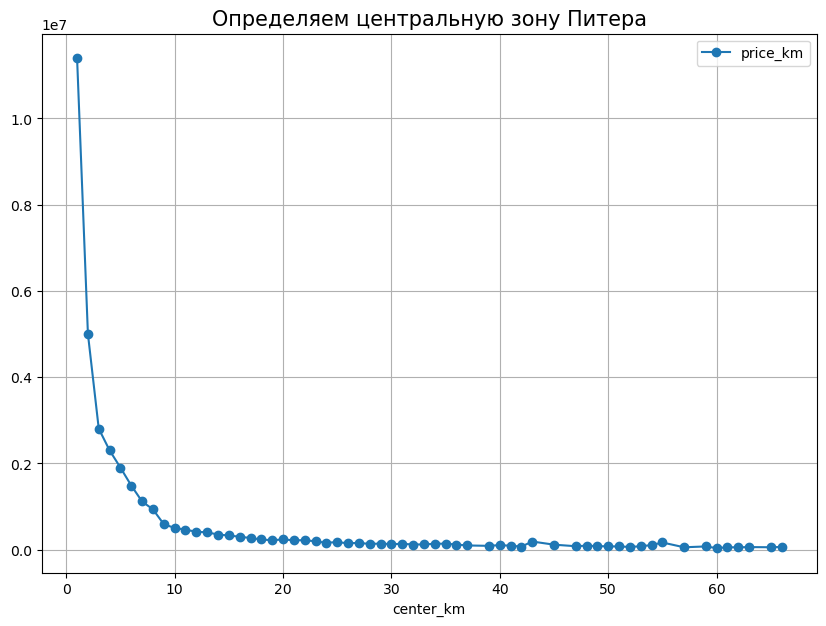

In [116]:
spb_center = df.pivot_table(index='center_km', values='price_km', aggfunc='median')
spb_center.plot(y='price_km',  style='o-', figsize=(10,7), grid=True)
plt.title('Определяем центральную зону Питера', fontsize=15)
plt.show()

- На графике виден 'обрыв' в зоне 5-5.5 км, это и является центром
- Также видно, как меняется цена взависимости от расстояния от центра, чем дальше от центра, тем дешевле квартира

In [117]:
#отфильтруем квартиры в центре
spb_segment = df[(df['center_km'] <= 5.5) & (df['locality_name'] == 'санкт-петербург')]

In [118]:
spb_segment['total_area'].describe()

count    2487.000000
mean       95.637021
std        59.040476
min        12.000000
25%        60.050000
50%        82.000000
75%       112.100000
max       631.200000
Name: total_area, dtype: float64

count    2487.000000
mean       95.637021
std        59.040476
min        12.000000
25%        60.050000
50%        82.000000
75%       112.100000
max       631.200000
Name: total_area, dtype: float64


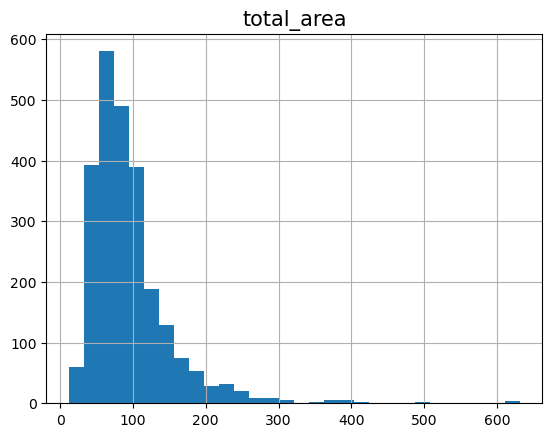

count    2.487000e+03
mean     1.480580e+07
std      2.611717e+07
min      1.600000e+06
25%      6.950000e+06
50%      9.500000e+06
75%      1.425000e+07
max      7.630000e+08
Name: last_price, dtype: float64


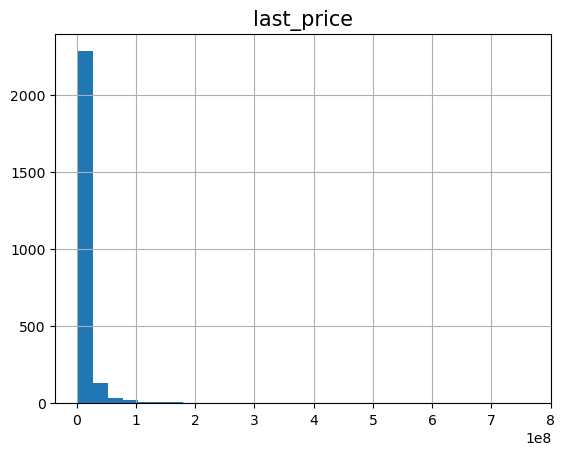

count    2487.000000
mean        2.967431
std         1.504132
min         0.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        19.000000
Name: rooms, dtype: float64


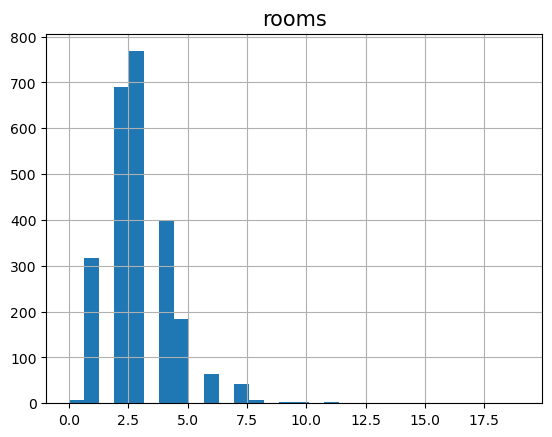

count    2487.000000
mean        2.528749
std         0.941510
min         2.000000
25%         2.000000
50%         2.000000
75%         3.000000
max        32.000000
Name: ceiling_height, dtype: float64


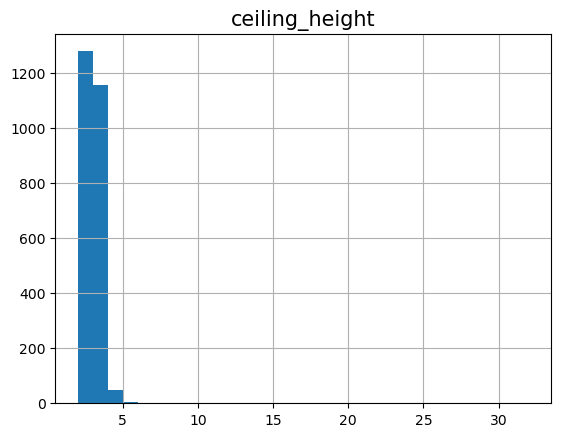

count    2487.000000
mean      234.779654
std       268.652369
min         3.000000
25%        76.000000
50%       103.000000
75%       314.500000
max      1572.000000
Name: days_exposition, dtype: float64


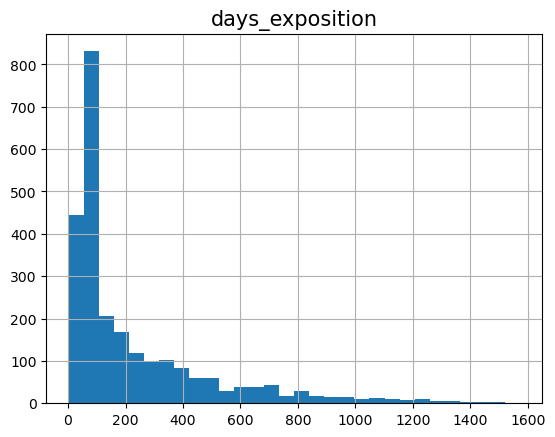

In [119]:
for column in spb_segment[['total_area','last_price','rooms','ceiling_height','days_exposition']]:
    spb_segment[column].hist(bins=30)
    print(spb_segment[column].describe())
    plt.title(column, fontsize=15)
    plt.show()    

count    2487.000000
mean       95.637021
std        59.040476
min        12.000000
25%        60.050000
50%        82.000000
75%       112.100000
max       631.200000
Name: total_area, dtype: float64


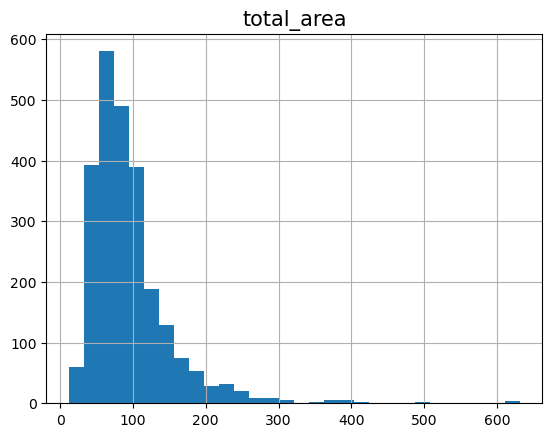

count    2.487000e+03
mean     1.480580e+07
std      2.611717e+07
min      1.600000e+06
25%      6.950000e+06
50%      9.500000e+06
75%      1.425000e+07
max      7.630000e+08
Name: last_price, dtype: float64


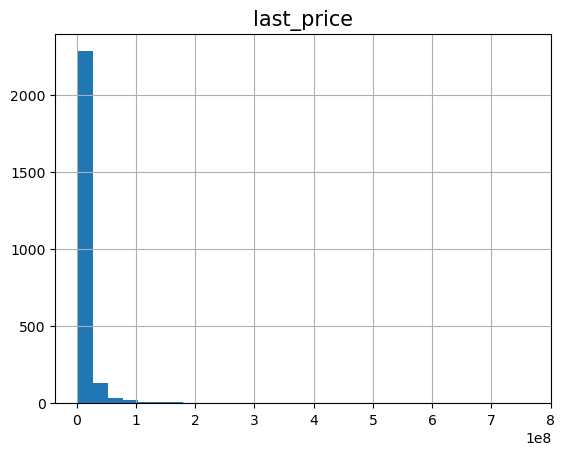

count    2487.000000
mean        2.967431
std         1.504132
min         0.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        19.000000
Name: rooms, dtype: float64


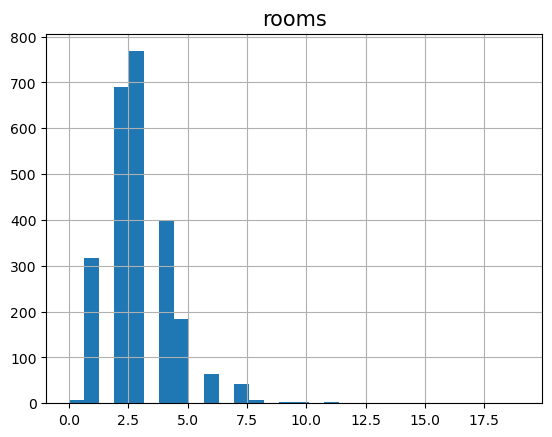

count    2487.000000
mean        2.528749
std         0.941510
min         2.000000
25%         2.000000
50%         2.000000
75%         3.000000
max        32.000000
Name: ceiling_height, dtype: float64


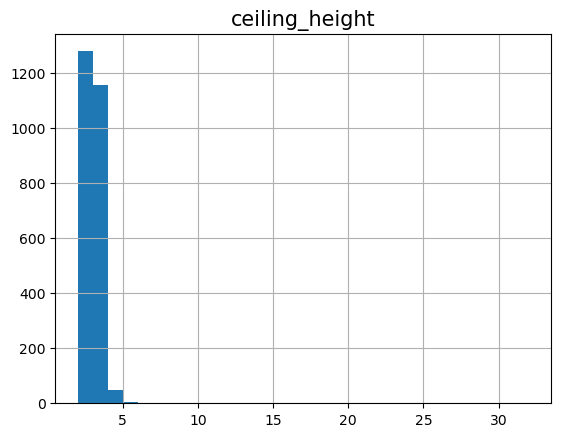

count    2487.000000
mean      234.779654
std       268.652369
min         3.000000
25%        76.000000
50%       103.000000
75%       314.500000
max      1572.000000
Name: days_exposition, dtype: float64


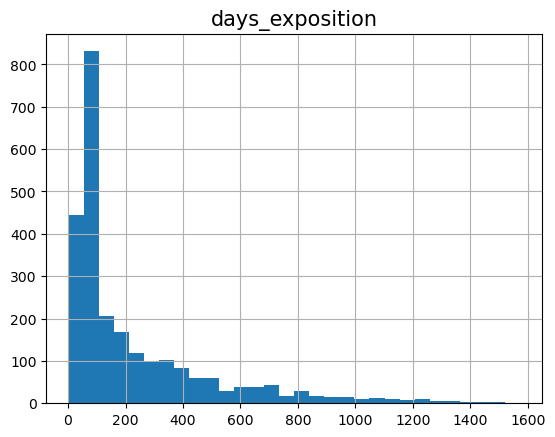

In [120]:
for column in spb_segment[['total_area','last_price','rooms','ceiling_height','days_exposition']]:
    spb_segment[column].hist(bins=30)
    print(spb_segment[column].describe())
    plt.title(column, fontsize=15)
    plt.show()    

In [121]:
#создадим датафрейм с нужными для анализа столбцами
corr_matrix = spb_segment[['total_images', 'last_price', 'total_area','rooms',
                           'ceiling_height','floors_total','living_area','floor','kitchen_area','airports_nearest',
                           'city_centers_nearest','parks_around3000','parks_nearest',
                           'ponds_around3000','ponds_nearest','days_exposition','price_m',
                           'year','month','week_day', 'living_ratio','kitchen_ratio','center_km']]


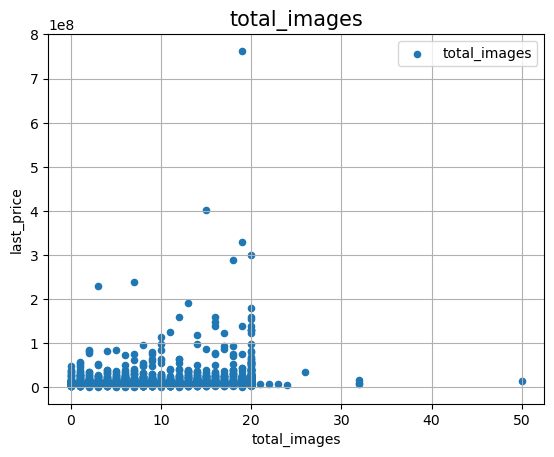

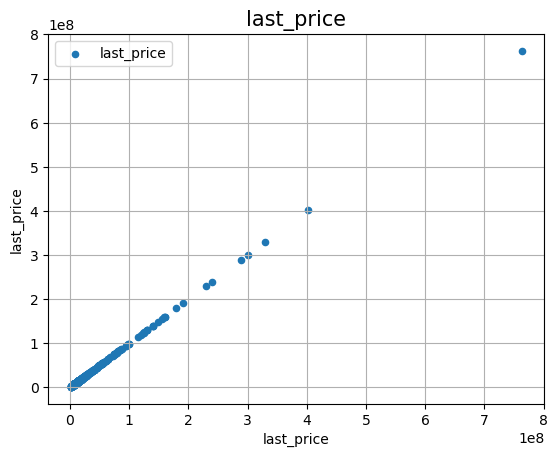

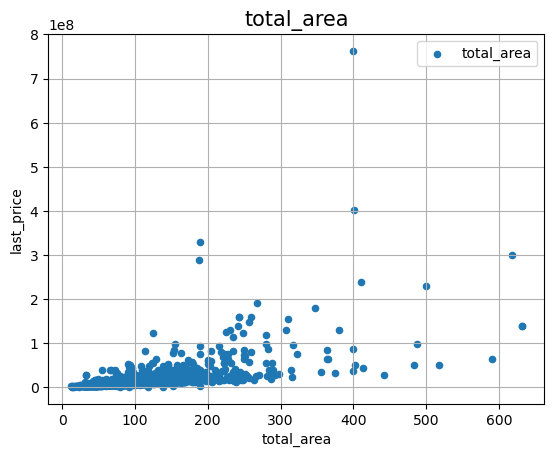

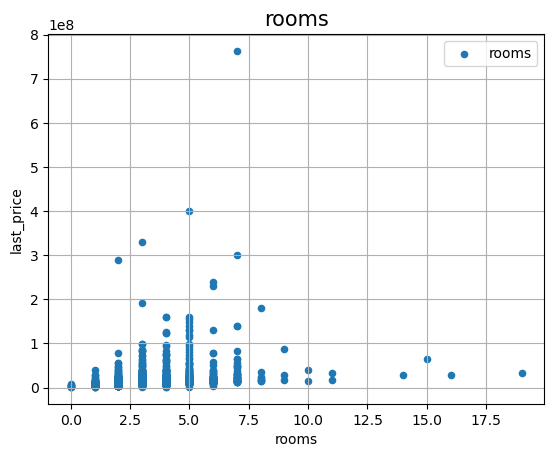

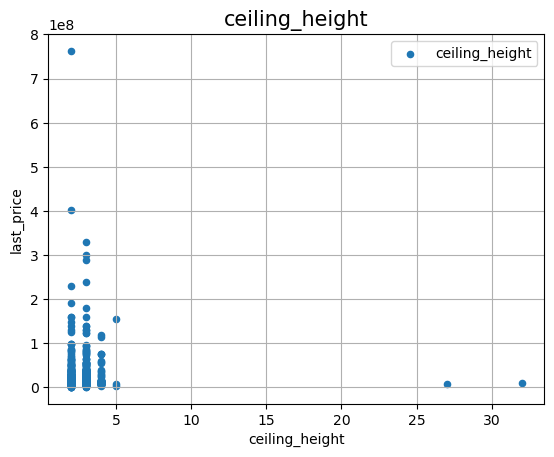

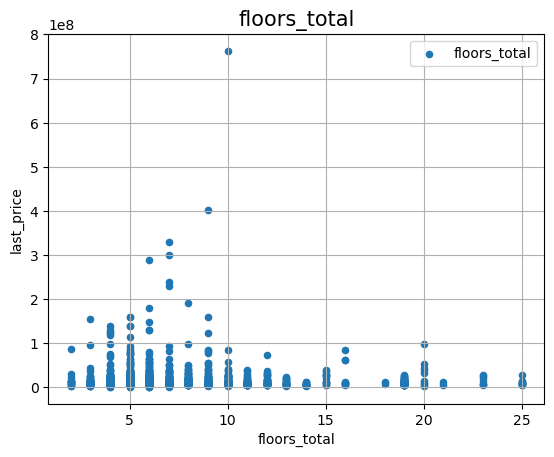

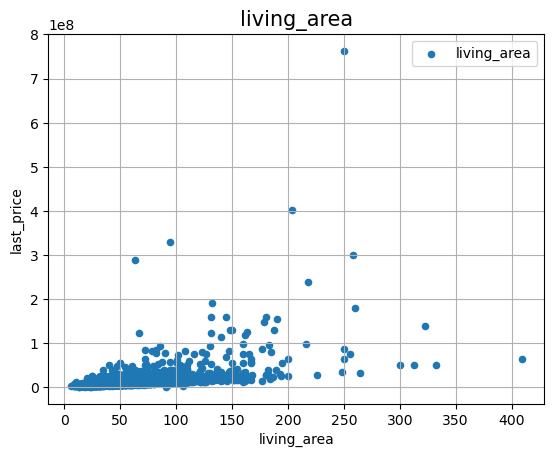

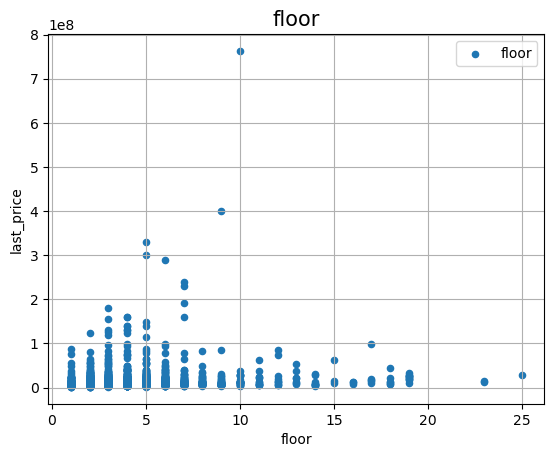

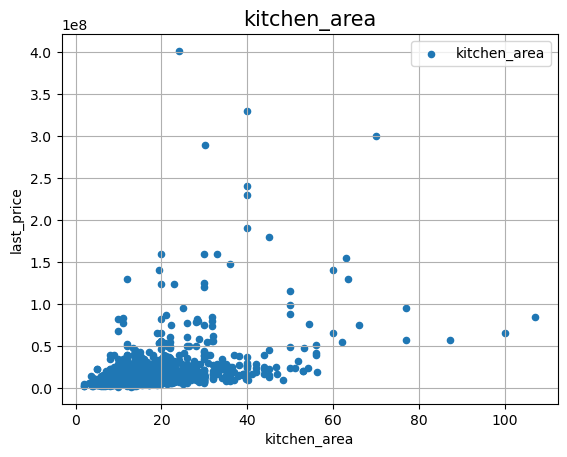

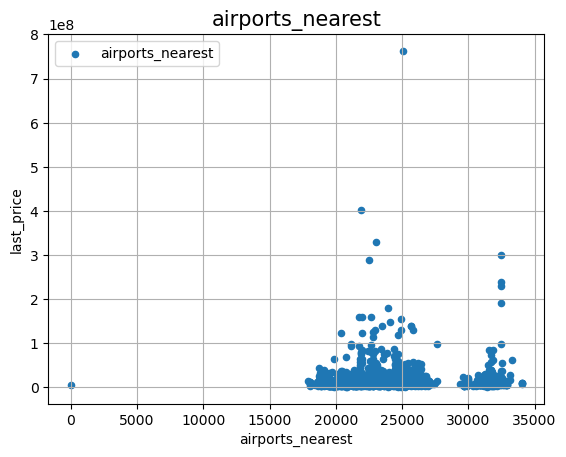

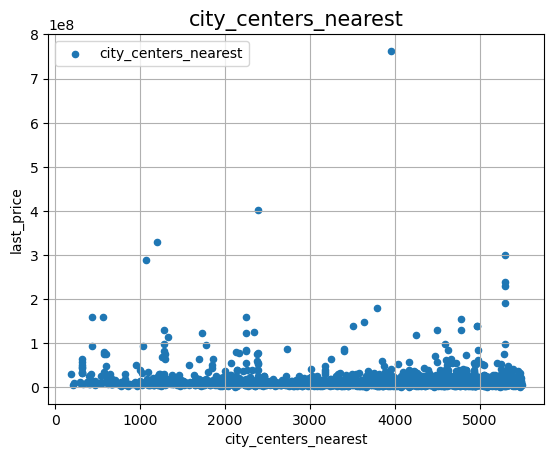

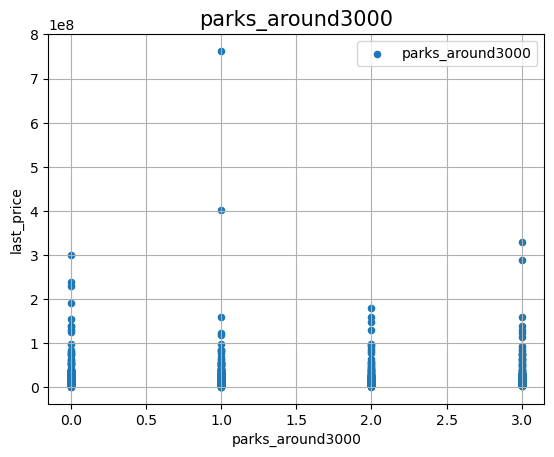

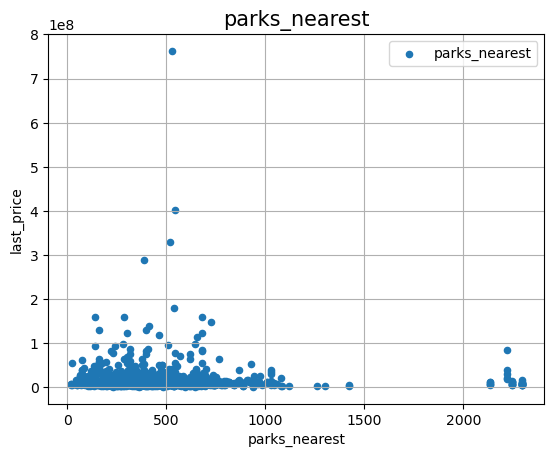

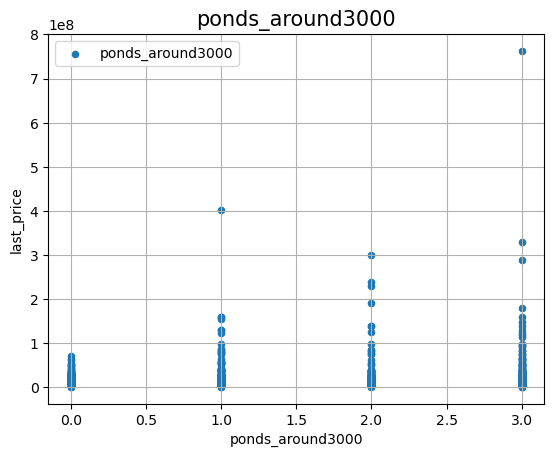

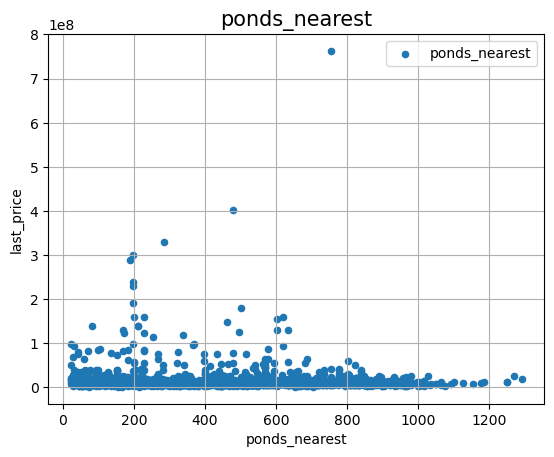

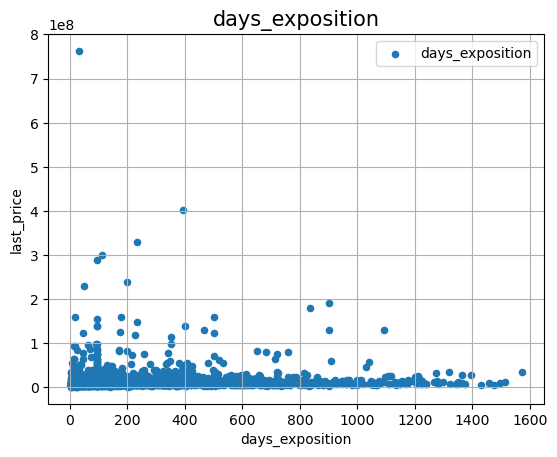

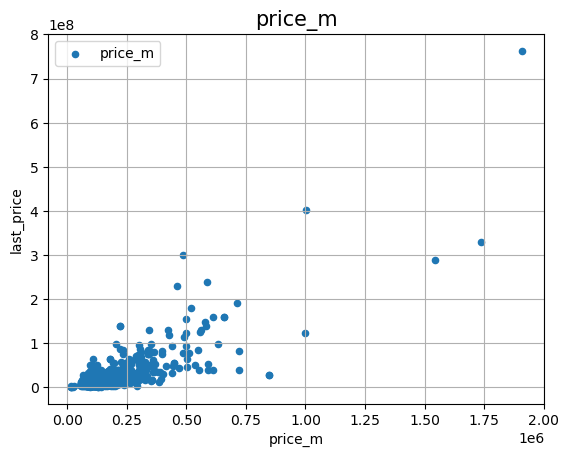

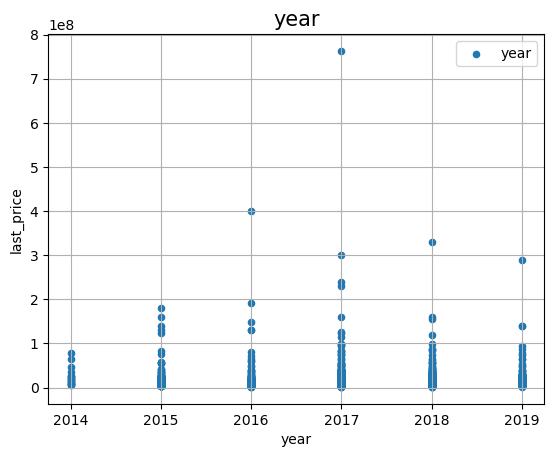

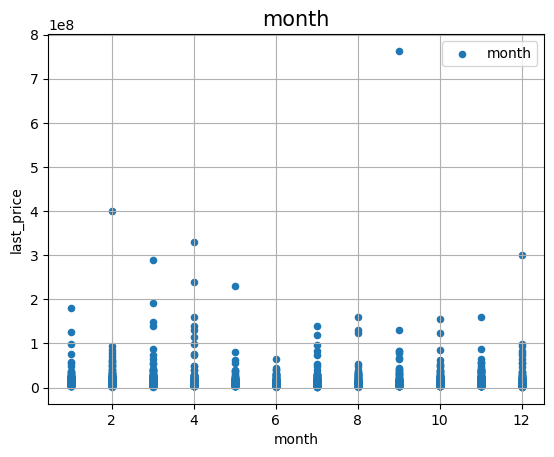

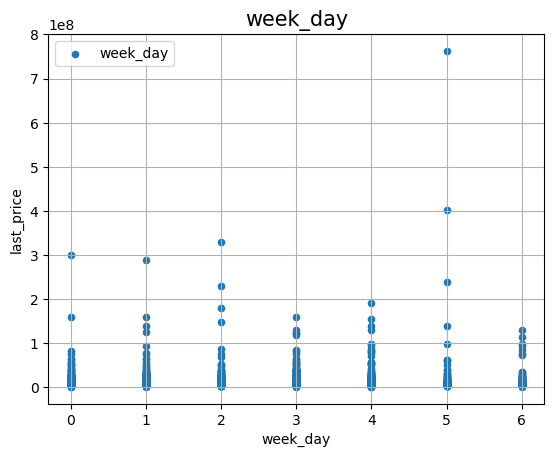

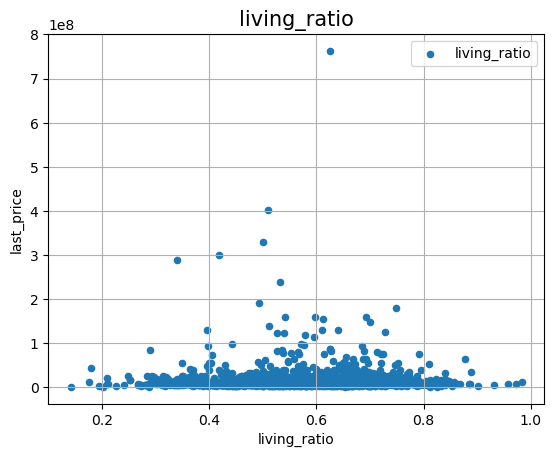

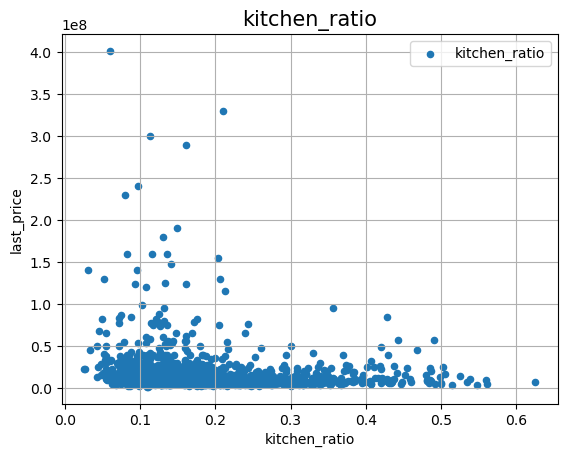

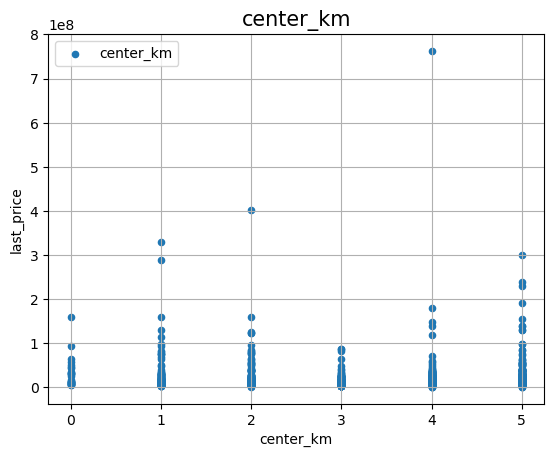

In [122]:
#напишем цикл, который построит диаграмму рассеяния отсортированную по убыванию столбца 'last_price'
for column in corr_matrix:
    corr_matrix.sort_values(by='last_price').plot(x=column, y='last_price', kind='scatter', label=column, grid=True)
    plt.title(column, fontsize=15)
    plt.show()

In [123]:
#так же вручную посмотрим кореляцию, отсортированную по убыванию столбца 'last_price', округленного до 2х знаков
round(corr_matrix.corr().sort_values(by='last_price'), 2)     

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,airports_nearest,...,ponds_around3000,ponds_nearest,days_exposition,price_m,year,month,week_day,living_ratio,kitchen_ratio,center_km
kitchen_ratio,0.06,-0.09,-0.33,-0.49,-0.04,0.15,-0.46,0.05,0.47,0.09,...,0.00,0.05,0.01,0.13,0.01,-0.02,0.02,-0.64,1.00,0.06
center_km,-0.04,-0.07,-0.05,-0.08,-0.06,0.32,-0.11,0.21,-0.03,0.39,...,-0.46,0.41,0.02,-0.11,0.01,-0.00,-0.03,-0.14,0.06,1.00
city_centers_nearest,-0.04,-0.07,-0.06,-0.10,-0.07,0.33,-0.12,0.22,-0.03,0.39,...,-0.48,0.41,0.02,-0.10,0.00,-0.00,-0.04,-0.15,0.07,0.98
ponds_nearest,0.03,-0.06,-0.06,-0.04,-0.03,0.12,-0.04,0.06,-0.02,0.11,...,-0.44,1.00,-0.01,-0.07,0.02,0.05,-0.04,-0.06,0.05,0.41
month,-0.03,-0.02,-0.05,-0.06,-0.03,0.03,-0.04,0.02,-0.08,-0.03,...,-0.01,0.05,-0.02,-0.01,-0.23,1.00,0.03,0.02,-0.02,-0.00
year,0.16,-0.02,-0.04,-0.03,0.07,-0.07,-0.05,-0.06,-0.02,0.02,...,-0.01,0.02,-0.63,0.03,1.00,-0.23,0.00,0.02,0.01,0.01
parks_nearest,-0.05,-0.01,-0.05,-0.09,-0.12,0.31,-0.07,0.16,0.03,0.01,...,-0.07,0.09,0.02,0.01,-0.04,0.03,-0.01,-0.15,0.11,0.16
living_ratio,-0.03,-0.01,0.16,0.42,0.06,-0.34,0.43,-0.22,-0.29,-0.07,...,0.05,-0.06,-0.02,-0.11,0.02,0.02,0.00,1.00,-0.64,-0.14
days_exposition,-0.07,0.02,0.07,0.08,0.01,0.06,0.08,0.05,0.06,0.02,...,-0.01,-0.01,1.00,-0.00,-0.63,-0.02,-0.03,-0.02,0.01,0.02
ceiling_height,0.08,0.04,0.08,0.06,1.00,-0.12,0.10,-0.07,0.06,-0.01,...,0.05,-0.03,0.01,0.03,0.07,-0.03,-0.02,0.06,-0.04,-0.06


**Вывод:**
1. Средняя площадь квартиры в центре 82м2, за центром 52м2
2. Средняя цена в центре составляет 9млн.р , за центром в среднем 4.6 млн.р
3. В центре в среднем больше 3х комнатных квартир, за центром больше 2х комнатных
4. Высота потолков в центре и за ним в среднем составляет 2м
5. Квартиры в центре продаются на в среднем продаются на 8 дней дольше
6. Самая большая положительная корреляция между ценой на квартиру и ценой за м2, то есть чем больше цена квартиры, тем дороже м2
7. Так же положительная кореляция присутствует между ценой квартиры и общей площадью, жилой площадью и площадью кухни
8. Самая большая отрицательная кореляция(очень слабая!) присутствует между соотношением площадью кухни и жилой площадью, расстоянием до центра, то есть чем больше занимает кухня от жилой площади тем меньше цена и чем дальше от центра, тем меньше цена. - Подчеркну, что корреляция хоть и присутствует, но очень слабая, возможно корреляция не прямая, а более сложная

## 5. Общий вывод
- В данных много пропущенных значений, которые я постарался заменить там, где это возможно
- Нашли факторы, которые влияют на стоимость квартиры
- Нашли зависимости между этими факторами
- Разделили квартиры на сегменты и изучили их
- Сегмент квартир в центре отличается от сегмента за центром

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  посчитано и добавлено в таблицу: цена квадратного метра
- [x]  посчитано и добавлено в таблицу: день недели, месяц и год публикации объявления
- [x]  посчитано и добавлено в таблицу: этаж квартиры; варианты — первый, последний, другой
- [x]  посчитано и добавлено в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей
- [x]  изучены следующие параметры: площадь, цена, число комнат, высота потолков
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: «Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?»
- [x]  выполнено задание: «Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили».
- [x]  выполнено задание: «Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года». 
- [x]  выполнено задание: «Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце `locality_name`».
- [x]  выполнено задание: «Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (`locality_name`). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона».
- [x]  выполнено задание: «Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всей базе?»
- [x]  в каждом этапе есть выводы
- [x]  есть общий вывод